In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from tqdm.notebook import tqdm

In [2]:
!pip install seaborn -q

# Анализируем car_info

(2337, 10)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_1,target_2
523,s-7171445l,Hyundai Solaris,economy,petrol,4.58,2015,18120,2014,0,engine_check
728,A12644115d,Skoda Rapid,economy,petrol,2.66,2015,20184,2018,0,electro_bug
1634,X38351446S,Audi A4,premium,petrol,2.84,2013,24823,2019,1,engine_ignition
134,Q35935102P,Kia Rio X-line,economy,petrol,3.60,2015,22076,2016,1,electro_bug
1816,T-1599677J,Hyundai Solaris,economy,petrol,6.04,2015,18138,2018,0,break_bug


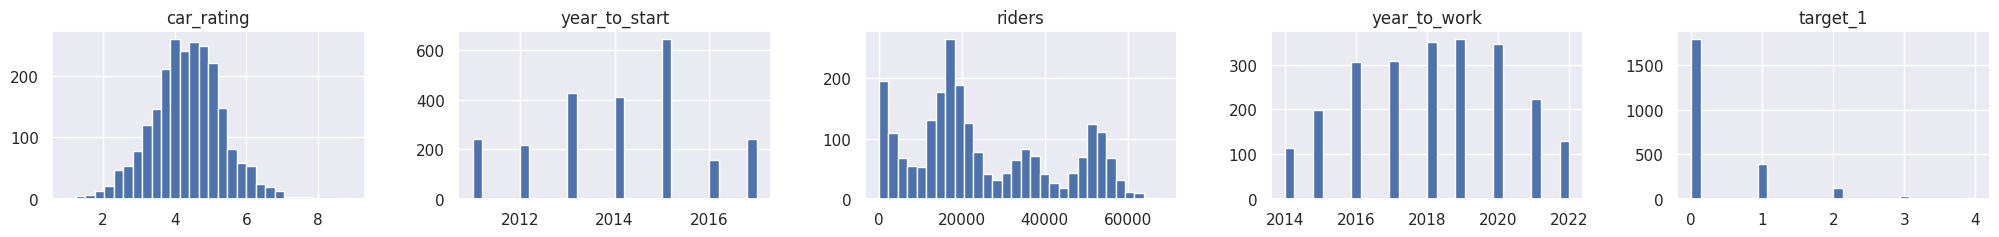

In [3]:
train = pd.read_csv('../data/car_train.csv')
print(train.shape)
train.hist(figsize=(25, 5), layout = (2, 5), bins = 30)
train.sample(5)

# Информация rides_info

(739500, 14)


,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
308573,z37536438l,V-9410203v,r1H,2020-02-07,4.61,27,320,45,52.000000,2,822.941677,0,-1.522707,4.257
500317,N14245527D,i11808136B,N1r,2020-02-05,7.00,47,417,39,50.000000,2,918.940424,0,11.201951,7.379
617724,N63889673Z,q59656547C,I1A,2020-01-13,4.59,47,463,41,65.000000,1,1996.310914,0,-7.709830,0.009
380731,a21546704v,a14328968W,F1Q,2020-01-11,6.53,13,254,50,84.000000,1,505.527216,0,8.274638,10.715
612893,v12124015f,q16111683Z,F1t,2020-02-04,5.52,37,327,37,74.651527,0,1451.943306,0,-3.129971,12.380


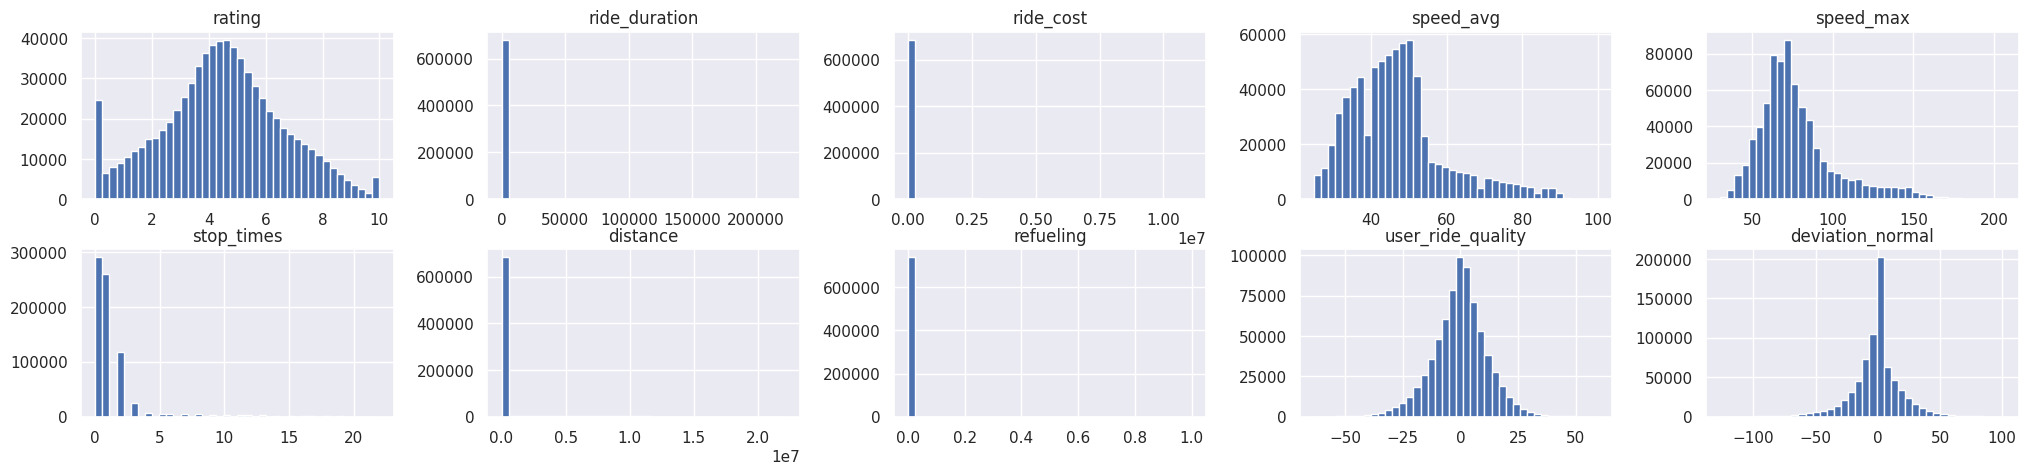

In [4]:
rides_info = pd.read_csv('../data/rides_info.csv')
print(rides_info.shape)
rides_info.hist(figsize=(25, 5), layout = (2, 5), bins = 40)
rides_info.sample(5)

# Генерируем признаки на основе данных про ремонт машин (fix_info)

(146000, 6)


,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
3052,w75595331T,BX,2021-10-25 18:50,refuel_check,1.0,31
138586,m-9118742h,AG,2019-4-2 9:9,reparking,1.0,27
144245,k-8455129n,OL,2020-9-24 4:7,repair,8.7,51
32803,U12612811k,OW,2019-11-24 23:35,repair,4.9,14
114470,L19397897Q,DD,2021-8-30 13:55,refuel,1.0,32


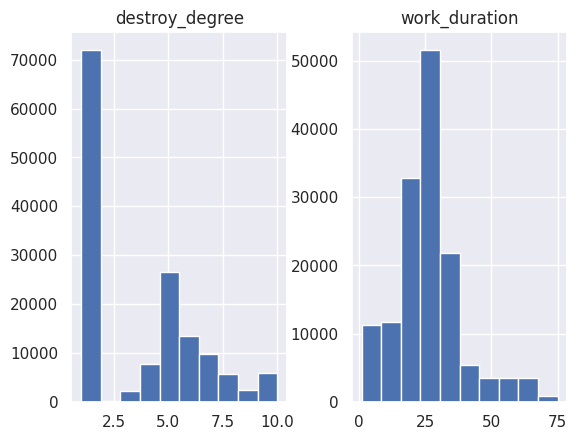

In [5]:
fix_info = pd.read_csv('../data/fix_info.csv')
print(fix_info.shape)
fix_info.hist()
fix_info.sample(5)

# Связка: `groupby()` + `agg()`


**[`df.aggregate()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html)** - Агрегирует с помощью одной или нескольких указазнных операций/функций по заданной оси. 

In [6]:
fix_info.groupby('car_id', as_index=False).aggregate({'worker_id':['count'],
                                                      'work_duration':['max', 'mean']}).head(5)

car_id worker_id work_duration           
                  count           max       mean
0  A-1068587k        34            70  28.617647
1  A-1122233S        35            68  29.228571
2  A-1124426f        34            61  23.735294
3  A-1242854j        35            62  28.114286
4  A-1270146E        34            40  23.705882

In [7]:
fix_info.groupby('car_id', as_index=False).agg(worker_id_count = ('worker_id', 'count'),
                                               work_duration_mean = ('work_duration', 'mean')).head()

,car_id,worker_id_count,work_duration_mean
0,A-1068587k,34,28.617647
1,A-1122233S,35,29.228571
2,A-1124426f,34,23.735294
3,A-1242854j,35,28.114286
4,A-1270146E,34,23.705882


In [8]:
# tmp = fix_info.groupby('worker_id', as_index=False).agg(work_duration_mean = ('work_duration', 'mean'))
# fix_info.merge(tmp, on = 'worker_id', how = 'left')

# Связка: `groupby()` + `transform()`

**[`df.transform()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html)** - Вызывает функцию для самостоятельного создания DataFrame с той же формой оси, как у исходной таблицы.

In [9]:
fix_info['worker_experience'] = fix_info.groupby('worker_id')['work_duration'].transform('mean')

fix_info.head(2)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_experience
0,Z16209094a,PJ,2020-6-20 2:14,reparking,1.0,21,26.679612
1,J-1559355B,ZJ,2020-2-9 20:25,repair,10.0,48,26.751773


In [10]:
fix_info['worker_experience'] = fix_info.groupby('worker_id')['car_id'].transform('count')

fix_info.head(2)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_experience
0,Z16209094a,PJ,2020-6-20 2:14,reparking,1.0,21,309
1,J-1559355B,ZJ,2020-2-9 20:25,repair,10.0,48,282


# Что вообще можно сгенерировать через groupby?

In [11]:
# Добавляем признаки из информации про ремонт

f_nuniq = lambda x : len(np.unique(x))
f_crit_q = lambda x : sum(x > 8.0)

avg_exp = fix_info['worker_experience'].median()
f_low_exp = lambda x: sum(x <= avg_exp*0.5)


first_mode = lambda x: pd.Series.mode(x) if len(pd.Series.mode(x)) == 1 else pd.Series.mode(x)[0]
second_mode = lambda x: np.unique([ i for i in x if i not in [pd.Series.mode(x).values[0]] ])[0] 


In [12]:
fix_info_gr = fix_info.groupby('car_id', as_index=False).agg(
    worker_count = ('worker_id', 'count'),
    work_duration_mean = ('work_duration', 'mean'),
    work_duration_max = ('work_duration', 'max'),
    destroy_degree_std = ('destroy_degree', 'std'),
    destroy_degree_sum = ('destroy_degree', 'sum'),

    work_type_nuniq = ('work_type', f_nuniq),

    work_type_moda = ('work_type', first_mode),
    work_type_seconde_moda = ('work_type', second_mode),
    
    work_type_crit_q = ('destroy_degree', f_crit_q),
    
    # worker_experience_mean = ('worker_experience', 'mean'),
    # worker_low_exp = ('worker_experience', f_low_exp),
)
fix_info_gr.sample(5)

,car_id,worker_count,work_duration_mean,work_duration_max,destroy_degree_std,destroy_degree_sum,work_type_nuniq,work_type_moda,work_type_seconde_moda,work_type_crit_q
1634,T20515718O,34,27.764706,48,3.293249,135.2,5,repair,oil_change,5
3340,o-2221625T,34,26.500000,68,2.990889,122.6,4,repair,refuel,3
1505,S-3564059L,34,23.235294,44,2.616554,125.9,4,repair,refuel,0
3861,u79195191i,35,28.914286,68,3.327565,139.0,4,repair,refuel,5
3064,k26379645k,34,29.264706,69,3.107252,119.7,4,reparking,refuel,2


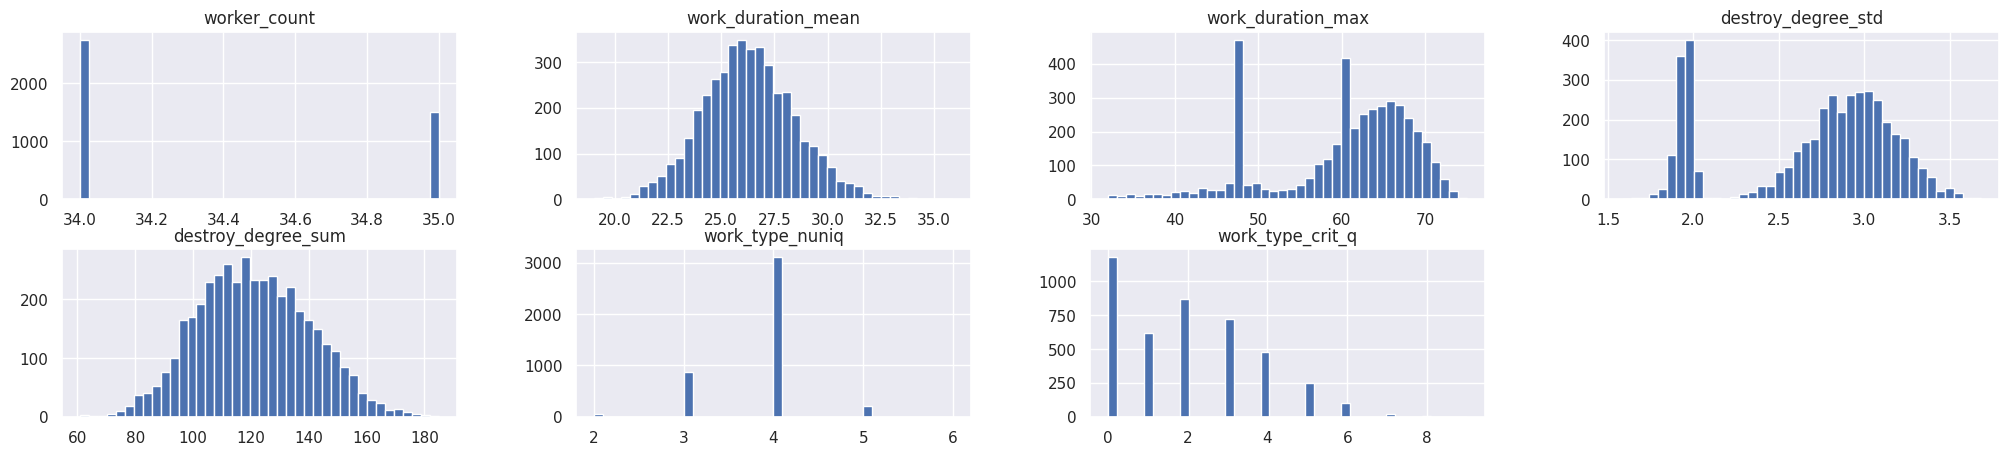

In [13]:
fix_info_gr.hist(figsize=(25, 5), layout = (2, 4), bins = 40);

In [14]:
train.head()

tmp = train.merge(fix_info_gr, on = 'car_id', how = 'left')
tmp.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_1,target_2,worker_count,work_duration_mean,work_duration_max,destroy_degree_std,destroy_degree_sum,work_type_nuniq,work_type_moda,work_type_seconde_moda,work_type_crit_q
0,Z16209094a,Smart Coupe,economy,petrol,4.90,2016,30228,2017,1,engine_overheat,35,24.057143,58,2.720550,99.7,4,reparking,refuel,2
1,J-1559355B,Renault Kaptur,standart,petrol,4.42,2015,14651,2017,1,electro_bug,35,28.257143,48,3.346208,151.8,3,reparking,refuel_check,5
2,i14360916r,Skoda Rapid,economy,petrol,3.62,2017,56425,2019,0,another_bug,35,26.028571,48,2.661721,102.8,4,reparking,refuel,1
3,c47847702x,VW Polo VI,economy,petrol,3.92,2013,19276,2017,0,electro_bug,35,26.628571,42,2.802466,112.1,5,reparking,refuel,0
4,D66316453N,VW Polo,economy,petrol,4.08,2013,14816,2021,0,engine_overheat,35,24.942857,66,2.743451,114.7,4,repair,refuel,2


# Небольшой анализ признаков

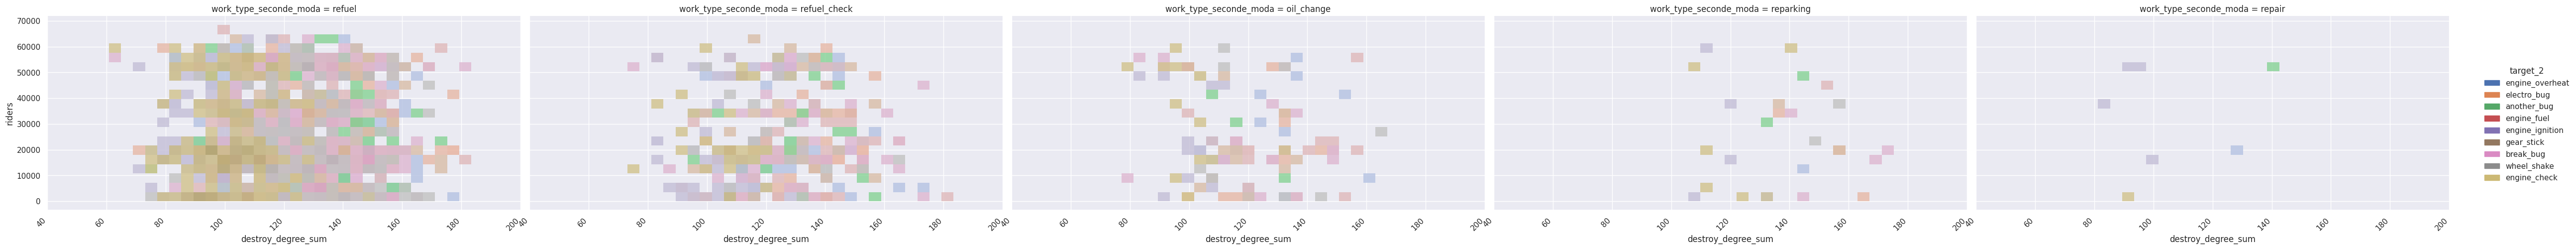

In [28]:
import seaborn as sns

g = sns.displot(data = tmp,
                x = 'destroy_degree_sum',
                y = 'riders',
                aspect = 2,
                kind = 'hist',
                alpha = 0.8,
                hue='target_2',
                col='work_type_seconde_moda'
               ).set_xticklabels(rotation=45, horizontalalignment='right');

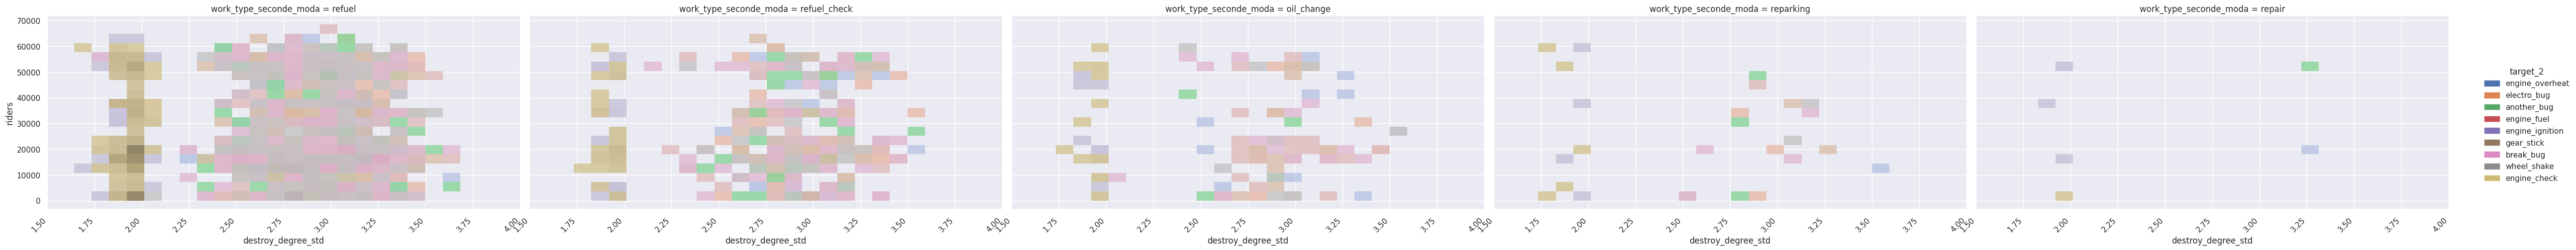

In [23]:
import seaborn as sns

g = sns.displot(data = tmp,
                x = 'destroy_degree_std',
                y = 'riders',
                aspect = 2,
                kind = 'hist',
                alpha = 0.8,
                hue='target_2',
                col='work_type_seconde_moda'
               ).set_xticklabels(rotation=45, horizontalalignment='right');

# Связка: `pivot()`/`pivot_table()` + `aggfunc()`

In [17]:

fix_info_pivot = fix_info.pivot_table(index = 'car_id', columns = ['work_type'], values = ['destroy_degree'], aggfunc = ['mean', 'count'])#.columns
fix_info_pivot.columns = [f'{i[2]}_{i[0]}' for i in fix_info_pivot.columns]
fix_info_pivot.reset_index(inplace=True)

fix_info_pivot.sample(5)


,car_id,oil_change_mean,refuel_mean,refuel_check_mean,refuel_reparking_mean,repair_mean,reparking_mean,oil_change_count,refuel_count,refuel_check_count,refuel_reparking_count,repair_count,reparking_count
2650,g-1820506Q,NaN,1.0,4.75,NaN,6.053333,2.2,NaN,1.0,4.0,NaN,15.0,15.0
4180,y97857448q,NaN,NaN,1.00,NaN,5.789474,1.0,NaN,NaN,2.0,NaN,19.0,13.0
3438,p19652219k,NaN,1.0,10.00,NaN,5.777778,1.0,NaN,2.0,1.0,NaN,18.0,13.0
202,C-1824427C,NaN,1.0,1.00,NaN,4.908696,1.0,NaN,2.0,2.0,NaN,23.0,7.0
2190,a15758562P,NaN,5.0,1.00,NaN,6.481818,2.5,NaN,2.0,6.0,NaN,11.0,16.0


In [18]:
rides_info = rides_info.merge(fix_info_gr, on = 'car_id', how = 'left')
rides_info.head(2)                                          

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,...,deviation_normal,worker_count,work_duration_mean,work_duration_max,destroy_degree_std,destroy_degree_sum,work_type_nuniq,work_type_moda,work_type_seconde_moda,work_type_crit_q
0,I13186944D,A-1068587k,o1A,2020-01-01,3.51,80238,1043089,38,52.0,3,...,-0.0,34,28.617647,70,1.803722,125.3,2,repair,reparking,0
1,R97784496t,A-1068587k,F1X,2020-01-01,5.72,105756,1480577,45,64.0,0,...,-0.0,34,28.617647,70,1.803722,125.3,2,repair,reparking,0


# Генерируем фичи по водителям

In [19]:
rider_info = pd.read_csv('../data/driver_info.csv').drop('sex', axis=1)
rider_info.sample(5)

,age,user_rating,user_rides,user_time_accident,user_id,first_ride_date
9121,41,8.9,41,6.0,h92173065s,2019-11-6
37,30,8.4,664,6.0,c20856952n,2020-8-6
10916,39,8.0,1061,0.0,z12668780D,2019-2-10
4235,40,8.8,1030,13.0,N53588533Y,2019-2-17
11552,36,7.1,677,6.0,v17251027s,2019-5-19


Задача. Сгенерируйте таблицу, в которой будет 

* `feature_min_max_diff` : разницу между максимальным и минимальным значениями 'deviation_normal' для каждой машины
* `feature_corner` : угол наклона по признаку 'user_ride_quality' для каждой машины
* `feature_mean` : среднее значение 'deviation_normal' для каждой машины
* `feature_shift` : точка перегиба/сдвига для 'deviation_normal'
* `feature_start` : значение для точки старта для 'deviation_normal'
* `fuature_nans`: сумма пропусков для столбца `...` для каждой машины 

In [20]:
rides = pd.read_csv('../data/rides_info.csv')
rides.head()

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,I13186944D,A-1068587k,o1A,2020-01-01,3.51,80238,1043089,38,52.000000,3,3.128016e+06,0,-0.302421,-0.0
1,R97784496t,A-1068587k,F1X,2020-01-01,5.72,105756,1480577,45,64.000000,0,4.864626e+06,0,-0.499172,-0.0
2,I13694599a,A-1068587k,f1j,2020-01-02,5.57,5,60,73,93.602158,0,4.176389e+02,0,-1.548536,-5.0
3,T93834217S,A-1068587k,Q1u,2020-01-02,4.52,46,640,45,62.000000,0,2.122785e+03,0,-1.010666,-0.0
4,J40497939H,A-1068587k,C1X,2020-01-03,7.12,39,306,39,58.000000,1,1.261300e+03,0,-0.940802,-0.0


In [21]:
# rider_info['sex'].value_counts()